# Un exemple d'utilisation d'hdf5 en python

## Jupyter notebooks

Un "notebook" est une feuille de travail interactive, dans laquelle vous allez pouvoir exécuter des
commandes, décrite dans des "cases" (les cellules).

Plusieurs environnements sont disponibles (menu kernel ci-dessus --> change kernel). On travaillera ici avec Python3.

Dans notre cas, chaque cellule pourra contenir soit du code python, soit des commentaires, du texte en markdown.

Voici un résumé des principaux raccourcis:

* Editer une cellule : Enter
* Exécuter le contenu d'une cellule : Shift + Enter
* Exécuter toutes les cellules : menu kernel (haut de la page) --> Run all
* Effacer la (les) cellule(s) sélectionnée(s) : dd
* Ajouter une cellule : Ctrl-m b
* Afficher les raccourcis : Ctrl-m h
* Liste des "magic commands" python : exécuter %lsmagic dans une cellule

Plus d'infos :  https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html#references

Attention: chaque cellule peut-être exécutée indépendamment des autres mais les résultats d'exécution sont conservées.
Pour repartir de zero il faut soit faire appel à "%reset" ou à restart dans le menu kernel

## Import du package hdf5

Pour utiliser hdf5 en python, nous aurons besoin du package h5py, https://www.h5py.org/. Voir la documentation h5py : http://docs.h5py.org/en/stable/.

Nous aurons également besoin de numpy qui est le package standard de calcul scientifique en python, http://www.numpy.org.

Nous l'utiliserons pour manipuler des matrices et des vecteurs.

In [1]:
import h5py
import numpy as np

Pour obtenir des infos sur un package ou une fonction, il suffit d'utiliser
"?", et la doc apparait en bas du navigateur.

In [2]:
?h5py

L'objectif de cette démo/TP est d'illustrer les concepts de base d'hdf5, à travers la création d'un exemple simple.
Nous allons sauvegarder dans un fichier hdf5 des champs scalaires représentant certaines grandeurs physiques sur une grille 3D (sous forme de tableau numpy), ajouter des metadonnées, organiser hiérarchiquement ces datasets et métadonnées, puis visualiser les datasets, les relire etc...

## Definition des variables

Pour commencer, on crée un tableau 3D de dimension Nx * Ny * Nz, rempli aléatoirement, grâce à numpy (np).

In [3]:
# Resolution du champ
Nx = Ny = Nz = 32 # 256
resolution = (Nx, Ny, Nz)

# Deux champs scalaires, initialisés aléatoirement
vx = np.random.random_sample(resolution)
temperature = np.random.random_sample(resolution)

Dans numpy, l'accès aux valeurs du tableau se fait comme suit 

(pour plus de détails voir un des nombreux tuto disponibles en ligne, par exemple,
https://docs.scipy.org/doc/numpy/user/quickstart.html)

In [4]:
# un exemple de manipulation de tableau ...
small_tab = np.random.random((4,6))
# un élement:
print(small_tab[3, 3])
# une "ligne"
print(small_tab[2, :])
# une sous-partie du tableau:   
print(small_tab[2:4, 2:4])
# le type, le rank, les dimensions, ...
print(small_tab.dtype)
print(small_tab.ndim)
print(small_tab.shape)

0.3595393010414597
[0.38995904 0.92439253 0.10038099 0.76935029 0.42354806 0.56252033]
[[0.10038099 0.76935029]
 [0.48986024 0.3595393 ]]
float64
2
(4, 6)


## 1 - Le "fichier" hdf5

Le "fichier" hdf5 est l'objet principal qui permettra de stocker vos données et leurs attributs. On parlera à la fois
de "fichier" pour le fichier sur le disque (extension .h5, .hdf5 ou .he5) et pour l'objet manipulé dans le code.

Il s'agit d'une sorte de container de **datasets** (les structures de données, voir plus bas) qui peut également être organisé en **groupes** et sous-groupes. 

**TP** - *Créez un "fichier" hdf5 en mode 'écriture'. Il faudra pour cela faire appel à la fonction
h5py.File*

Rappel : pour accèder à la doc, il suffit de taper
?h5py.NOM_FONCTION.

In [5]:
# Affichage de la documentation de la fonction
?h5py.File

# Ou si vous êtes dans l'interpréteur Python de votre environnement virtuel:
# help(h5py.File)

In [6]:
# h5f.close()   # au besoin, pour libérer l'identificateur de fichier (pour relancer la cellule)
filename = 'demo_v0.h5'
# Création/ouverture en mode 'ecriture'
mode = 'w'
h5f = h5py.File(filename, mode)

Quand toutes les données auront été sauvegardées, il sera nécessaire de fermer le fichier, pour
valider l'écriture sur le disque, via la fonction close().

Vérifiez que le fichier a bien été créé. *Notez au passage que dans ipython notebook vous avez accès à certaines commandes du terminal*

In [7]:
ls -l demo_v0.h5  # serveur jupyterhub GRICAD en UTC+0

-rw-r--r-- 1 lecoinal users 96 Jun  7 19:29 demo_v0.h5


Dans la mesure où h5py.File est une classe, on peut avoir accès à ses attributs et méthodes.

Dans le notebook il suffit d'utiliser la complétion pour avoir une liste complète des attributs:

nom_class. + TAB

*Affichage du nom du fichier sur le disque et le nom de l'objet file:*

In [8]:
print(h5f.name)      # nom du groupe racine : "/"
print(h5f.filename)  # nom du fichier sur le disque

/
demo_v0.h5


## Création de datasets: des tableaux dans le fichier hdf5

Dans un fichier hdf5, les "données" sont stockées sous forme de dataset.
Un dataset est un tableau multi-dimensionnel contenant des données d'un même type.

**TP** *Créez deux datasets dans le fichier hdf5, pour stocker les deux champs scalaires définis plus haut:*

* *un dataset 'data_velo' vide et de même résolution que vx*
* *un dataset 'data_tp' qui contient une copie de temperature*



In [9]:
# Création de dataset : 
?h5py.Dataset

In [10]:
?h5f.create_dataset

In [11]:
# Paramètres : nom, shape, type
data_velo = h5f.create_dataset('velocity', resolution, dtype=np.float64)
# Paramètres : un tableau numpy
data_tp = h5f.create_dataset('temperature', data=temperature)

## Manipulation des datasets

Les datasets peuvent être manipulés comme des tableaux numpy:

In [12]:
print(data_tp)
print(data_velo)
print(data_tp.shape)
# A ce stade, data_tp contient les mêmes valeurs que temperature tandis que tous les éléments de data_velo sont nuls.
print(np.allclose(data_tp, temperature))
print(data_tp[1, 5, 3])
print(temperature[1, 5, 3])
print(data_velo[1:10, 5, 3])

<HDF5 dataset "temperature": shape (32, 32, 32), type "<f8">
<HDF5 dataset "velocity": shape (32, 32, 32), type "<f8">
(32, 32, 32)
True
0.22741995838672102
0.22741995838672102
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


ou par l'intermédiaire du fichier hdf5, via leur nom:

In [13]:
print(h5f['velocity'])

<HDF5 dataset "velocity": shape (32, 32, 32), type "<f8">


On peut également accéder aux valeurs d'un dataset ainsi:

In [14]:
print(h5f['temperature'][1, 5, 3])
print(h5f['velocity'][1:10, 5, 3])


0.22741995838672102
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


A ce stade, temperature et h5f['temperature'] sont deux buffers distincts. Modifier l'un n'entraîne pas de modifications sur l'autre.

In [15]:
h5f['temperature'][1, 5, 3] = 0.
print(h5f['temperature'][1, 5, 3])
print(temperature[1, 5, 3])

temperature[0, 5, 3] = 0.
print(h5f['temperature'][0, 5, 3])
print(temperature[0, 5, 3])

0.0
0.22741995838672102
0.42463429703941824
0.0


Ce qui n'est pas le cas pour data_tp (et data_velo), qui sont assignées à h5f['temperature'] et h5f['velocity']

In [16]:
print(data_tp[1, 5, 3])
print(data_tp[0, 5, 3])

h5f['velocity'][0, 5, 3]=9999.0
print(h5f['velocity'][0, 5, 3],data_velo[0, 5, 3])
data_velo[1, 5, 3]=9999.0
print(h5f['velocity'][1, 5, 3],data_velo[1, 5, 3])



0.0
0.42463429703941824
9999.0 9999.0
9999.0 9999.0


La modification du contenu de chaque dataset est similaire à celle d'un tableau numpy.
Nous allons maintenant remplir data_velo en calculant le cosinus de vx:

In [17]:
data_velo[...] = np.cos(vx)
print(h5f['velocity'][1:10, 5, 3])

[0.99841273 0.65205882 0.98006632 0.9852359  0.91276179 0.85543132
 0.84252523 0.96526286 0.97505792]


## Itérer sur les datasets

Il est possible de récupérer la liste des datasets, ou d'itérer sur les datasets (dans l'ordre alphabétique par défaut):

In [18]:
print(h5f['/'].keys())
print(h5f.keys())
print(list(h5f))
for node in h5f:
    print(node)
    

<KeysViewHDF5 ['temperature', 'velocity']>
<KeysViewHDF5 ['temperature', 'velocity']>
['temperature', 'velocity']
temperature
velocity


## Les groupes

Il est donc possible de l'organiser les données en groupes et sous-groupes contenant des datasets, via la fonction
create_group.

**TP:** *Créez un groupe 'champs' et un groupe 'infos' contenant un sous-groupe  'diverses'.*

Remarque: l'objet fichier hdf5 possède a une structure arborescente, à la manière d'un système de fichier classique.
Nous avons vu plus haut que le nom de l'objet h5f est '/'. Cela se traduit également dans la manière de nommer les groupes. le groupe 'diverses' apparaitra ainsi:

/infos/diverses.

On doit donc avoir un fichier avec ce contenu:
```
> h5dump -n demo_v0.h5
HDF5 "demo_v0.h5" {
FILE_CONTENTS {
 group      /
 group      /champs
 group      /infos
 group      /infos/diverses
 dataset    /temperature
 dataset    /velocity
 }
}
```

In [19]:
?h5py.File.create_group

In [20]:
# Creation d'un groupe 'champs'
g1 = h5f.create_group('champs')
# Puis d'un groupe infos/diverses
h5f.create_group('/infos/diverses/')

<HDF5 group "/infos/diverses" (0 members)>

L'accès aux données et attributs se fait de manière classique:

In [21]:
print(h5f['/'])
print(h5f['champs'])
print(h5f['infos'])
print(h5f['infos/diverses'])

<HDF5 group "/" (4 members)>
<HDF5 group "/champs" (0 members)>
<HDF5 group "/infos" (1 members)>
<HDF5 group "/infos/diverses" (0 members)>


Nous sommes maintenant en mesure de créer un dataset dans le groupe champs

In [22]:
g1.create_dataset('density', resolution, dtype=np.float64)

<HDF5 dataset "density": shape (32, 32, 32), type "<f8">

On peut balayer tous les éléments du groupe

In [23]:
for it in h5f.items():
    print(it)

print("groupe champs ...")
for it in h5f['champs'].items():
    print(it)

print("groupe infos ...")
for it in h5f['infos'].items():
    print(it)

('champs', <HDF5 group "/champs" (1 members)>)
('infos', <HDF5 group "/infos" (1 members)>)
('temperature', <HDF5 dataset "temperature": shape (32, 32, 32), type "<f8">)
('velocity', <HDF5 dataset "velocity": shape (32, 32, 32), type "<f8">)
groupe champs ...
('density', <HDF5 dataset "density": shape (32, 32, 32), type "<f8">)
groupe infos ...
('diverses', <HDF5 group "/infos/diverses" (0 members)>)


In [24]:
list(h5f)

['champs', 'infos', 'temperature', 'velocity']

L'objet h5f s'apparente à un dictionnaire:

In [25]:
h5f['/champs']

<HDF5 group "/champs" (1 members)>

In [26]:
# on peut voir et accéder aux membres de ce groupe:
print(list(h5f['/champs'].items()))
print(list(h5f['/champs']))

[('density', <HDF5 dataset "density": shape (32, 32, 32), type "<f8">)]
['density']


Pour itérer récursivement sur tous les objets (Groupes et Datasets)

In [27]:
def print_name(name, obj):
    print(name)

In [28]:
h5f.visititems(print_name)

champs
champs/density
infos
infos/diverses
temperature
velocity


Ou également supprimer un groupe avec la fonction python del

In [29]:
del h5f['/infos/diverses']

In [30]:
print(g1['density'])

<HDF5 dataset "density": shape (32, 32, 32), type "<f8">


## Attributs

Un autre intérêt du format hdf5 est de pouvoir associer aux datasets et groupes des méta-données, i.e. des informations sous formes d'attributs.

Voici quelques exemples:

In [31]:
h5f['velocity'].attrs['année'] = 2015
h5f['velocity'].attrs['commentaires'] = 'Valeurs experimentales du champs de vitesse'
g1['density'].attrs['description'] = u"une description du champs"

Puis afficher les caractéristiques d'un dataset:

In [32]:
for ita,itv in zip(h5f['velocity'].attrs,h5f['velocity'].attrs.values()):
    print(ita,itv)

année 2015
commentaires Valeurs experimentales du champs de vitesse


In [33]:
for ita,itv in zip(h5f['/champs/density'].attrs,h5f['/champs/density'].attrs.values()):
    print(ita,itv)

description une description du champs


## Filtres et Compression

In [34]:
# create a gauspulse : mimic a surface wave
from scipy.signal import gausspulse
def compute_gauspuls(time0,X):
    # default fr bw in gausspulse is 0.5
    gp = gausspulse(time0,X)
    return gp
# time vector in sec (only positive part: GF would be symmetric)
sf = 10 # sampling frequency
fc = 0.15 # central frequency
time0 = np.arange(-150.0, 150.0+1.0/float(sf), 1.0/float(sf))
gp = compute_gauspuls(time0,fc)
vel = 3.0  # km/s
distance = 200.0 # km
decalage = int(round(sf*(distance/vel)))
sw = np.roll(gp, decalage) + np.roll(gp, -decalage)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(time0,gp)
plt.plot(time0,sw)

print(sw.shape)

(3001,)


On écrit ce signal synthétique dans un fichier HDF5. Pour cela on va l'encoder en réel simple précision (F32) et on va activer divers filtre de compression:

In [35]:
h5f.create_dataset("sw", shape=sw.shape, dtype='float32', data=sw.astype('float32'))
h5f.create_dataset("sw_gz6",shape=sw.shape, dtype='float32', data=sw.astype('float32'), compression='gzip', compression_opts=6)
h5f.create_dataset("sw_shuffle_gz6",shape=sw.shape, dtype='float32', data=sw.astype('float32'), compression='gzip', compression_opts=6, shuffle='True')
h5f.create_dataset("sw_fl_gz6",shape=sw.shape, dtype='float32', data=sw.astype('float32'), compression='gzip', compression_opts=6, fletcher32='True')
h5f.create_dataset("sw_so",shape=sw.shape, dtype='float32', data=sw.astype('float32'), scaleoffset=2)

<HDF5 dataset "sw_so": shape (3001,), type "<f4">

## Ecriture et fermeture du fichier :

Nous sommes maintenant en mesure de fermer le fichier.

In [36]:
h5f.close()

La visualisation des données peut se faire par différentes méthodes:

* h5dump / h5ls
* hdfview
* un logiciel capable de lire du hdf5 (visit ...)


**TP:** 

*1) Visualisez le contenu du fichier avec hdfview et h5dump/h5ls, dans votre terminal*

*2) Explorer les attributs des objets Groupes et Datasets*

*3) Comparer les taux de compression obtenus avec les différents filtres de compression*

*4) Utilisez h5diff pour vérifier que les différents datasets compressés sont bien égaux entre eux*

*5) Essayez de refaire sw_gz6 mais avec h5repack : voir s'il est identique au sw_gz6 créé par h5py ?*

*6) Utilisez h5repack pour "dupliquer" sw mais avec un algo de compression avec perte (par exemple scale-offset), puis le comparer à sw avec h5diff, ...*



Nous allons maintenant repartir de zero et charger des données d'un fichier hdf5

## Lecture d'un fichier hdf5

**TP** *Créez un tableau 'swp' à partir de sw du fichier hdf5 'demo_v0.h5' en relisant uniquement le côté des temps positifs (donc entre 1500 et 3001)*

* ouvrir le fichier demo_v0.h5
* créer le tableau numpy à partir du dataset sw (ou l'un des datasets compressés)

Notes : 
* la lecture se fait simplement en créant un objet fichier en mode 'lecture'
* on peut reire directement un subset d'un dataset ainsi:
il faudra utiliser la fonction np.asarray pour assurer la conversion du dataset vers le tableau numpy
 
 subset_data = h5f['/dsetname'][i0:i1]


In [37]:
# Remise à zero de l'environnement ...
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [38]:
import h5py
import numpy as np

In [39]:
# Lecture du fichier hdf5
filename = 'demo_v0.h5'
in_file = h5py.File(filename, 'r')

Affichage du contenu du fichier ...

Notez au passage l'intérêt du format hdf5 : le fichier est 'auto-suffisant': toutes les informations
nécessaires à la comprehension de son contenu sont disponibles (noms des variables, dimensions des tableaux ...)

In [40]:
# On balaies tout le contenu du fichier (datasets et groupes)
for keys in in_file:
    print(keys, in_file[keys])
    # Dans chaque cas, on affiche la liste des attributs
    for it in in_file[keys].attrs.items():
        print('-->', it)

champs <HDF5 group "/champs" (1 members)>
infos <HDF5 group "/infos" (0 members)>
sw <HDF5 dataset "sw": shape (3001,), type "<f4">
sw_fl_gz6 <HDF5 dataset "sw_fl_gz6": shape (3001,), type "<f4">
sw_gz6 <HDF5 dataset "sw_gz6": shape (3001,), type "<f4">
sw_shuffle_gz6 <HDF5 dataset "sw_shuffle_gz6": shape (3001,), type "<f4">
sw_so <HDF5 dataset "sw_so": shape (3001,), type "<f4">
temperature <HDF5 dataset "temperature": shape (32, 32, 32), type "<f8">
velocity <HDF5 dataset "velocity": shape (32, 32, 32), type "<f8">
--> ('année', 2015)
--> ('commentaires', 'Valeurs experimentales du champs de vitesse')


In [41]:
# Création d'un nouveau tableau
swp = in_file['sw_gz6'][1500:3001]
print(swp.shape)
print(swp.size)
print(swp.dtype)

(1501,)
1501
float32


In [42]:
swpso = in_file['sw_so'][1500:3001]
print(np.allclose(swp,swpso))

False


In [43]:
# Ne pas oublier de fermer le fichier!
in_file.close()

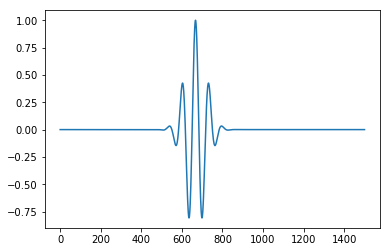

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(swp)

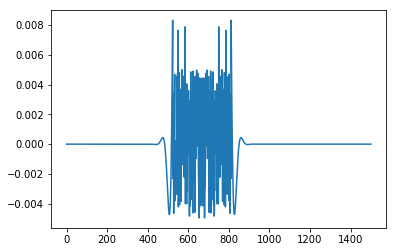

In [46]:
plt.plot(swp-swpso)